In [1]:
import pandas as pd
import numpy as np
from re import sub
import matplotlib.pyplot as plt

In [2]:
def add_bar_labels(axis) -> None:
    """
    Add bar labels to the plot for each container
    
    :param axis: The axis to add the labels to
    :return: None
    """
    for cont in axis.containers:
        axis.bar_label(cont)

In [3]:
# Read the data
e_waste = pd.read_csv('data/Electronic Waste.csv')
e_waste

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of 2,20.0,20.0,25.0,22.0,19.0,16.0
1,Put unwanted computers in the garbage 3,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
3,Returned unwanted computers to a supplier or r...,NaN,NaN,16.0,21.0,15.0,6.0
4,Donated or gave away unwanted computers 3,31.0,19.0,NaN,9.0,12.0,16.0
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55.0,49.0,51.0,42.0,45.0,37.0
78,Took or sent unwanted mercury-containing light...,16.0,23.0,22.0,32.0,34.0,46.0
79,Returned unwanted mercury-containing lights to...,9.0,13.0,7.0,NaN,8.0,8.0
80,Still had unwanted mercury-containing lights a...,15.0,10.0,15.0,22.0,16.0,15.0


In [4]:
# Clean up the field column
e_waste['field'] = e_waste['field'].apply(lambda x: sub(f'\d+', '', x).strip())
e_waste

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
3,Returned unwanted computers to a supplier or r...,NaN,NaN,16.0,21.0,15.0,6.0
4,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55.0,49.0,51.0,42.0,45.0,37.0
78,Took or sent unwanted mercury-containing light...,16.0,23.0,22.0,32.0,34.0,46.0
79,Returned unwanted mercury-containing lights to...,9.0,13.0,7.0,NaN,8.0,8.0
80,Still had unwanted mercury-containing lights a...,15.0,10.0,15.0,22.0,16.0,15.0


In [5]:
# Get only the computer-related data points
computers = e_waste[
    (e_waste['field'].str.contains('computers')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

computers

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
2,Returned unwanted computers to a supplier or r...,NaN,NaN,16.0,21.0,15.0,6.0
3,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
4,Still had unwanted computers at the time of in...,28.0,34.0,26.0,29.0,27.0,23.0


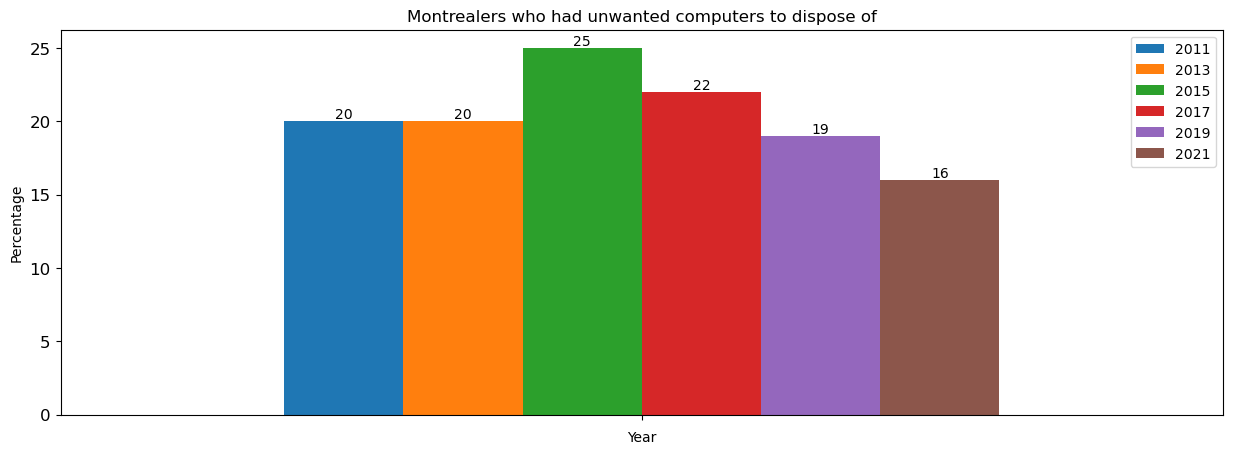

In [6]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted computers to dispose of
had_unwanted = computers[computers['field'] == 'Had unwanted computers to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted computers to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig('images/computers_main_plot.png')

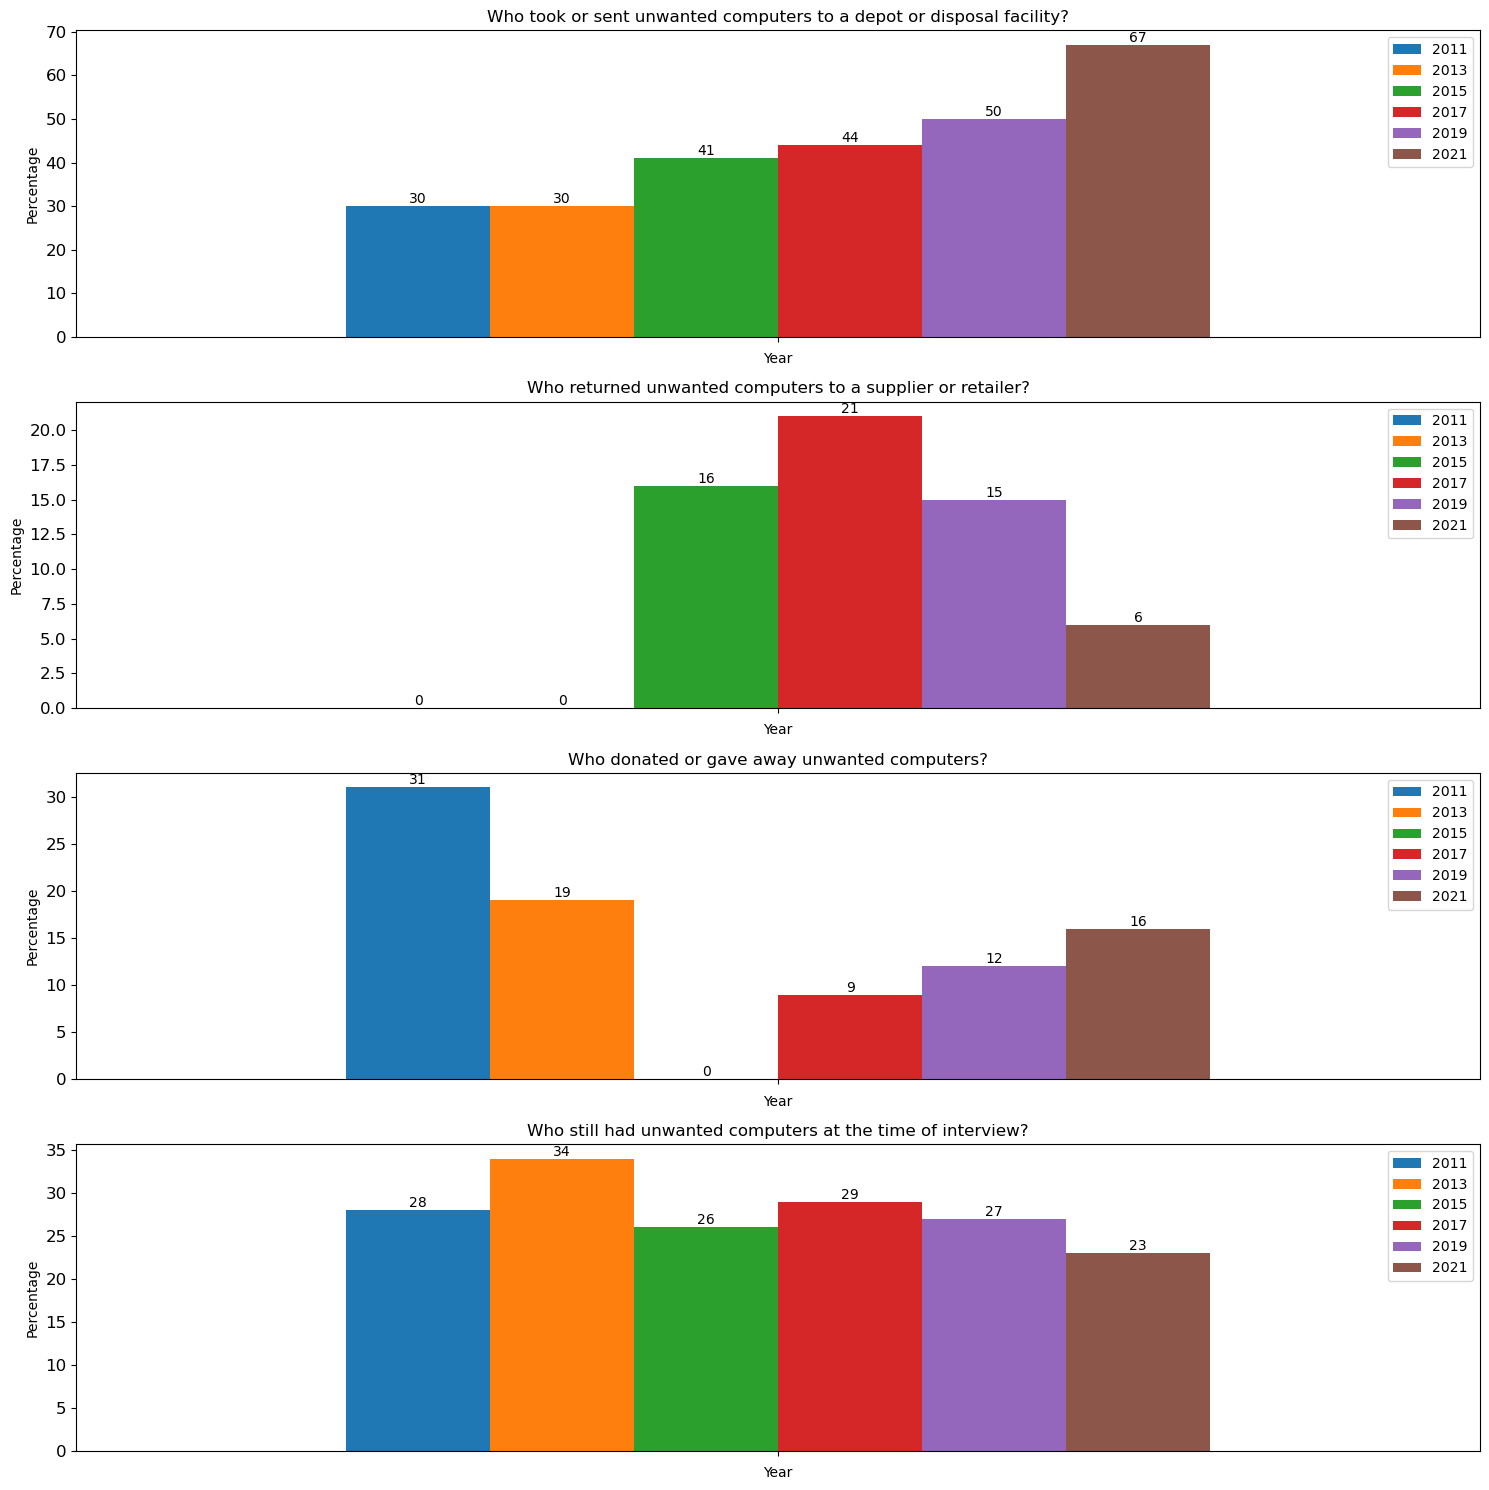

In [7]:
# Create subplots for Plots 2 to 5
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(4, 1, figsize=(15, 15))

# Plot 2: Bar graph for Montrealers who took or sent unwanted computers to a depot or disposal facility
took_or_sent = computers[computers['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted computers to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who returned unwanted computers to a supplier or retailer
computers_returned = computers[computers['field'].str.contains('Returned unwanted')].iloc[:, 1:]
computers_returned.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who returned unwanted computers to a supplier or retailer?')
add_bar_labels(ax3)

# Plot 4: Bar graph for Montrealers who donated or gave away unwanted computers
computers_donated = computers[computers['field'].str.contains('Donated or gave away')].iloc[:, 1:]
computers_donated.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
ax4.set_xticklabels('')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage')
ax4.set_title('Who donated or gave away unwanted computers?')
add_bar_labels(ax4)

# Plot 5: Bar graph for Montrealers who still had unwanted computers at the time of interview
computers_still = computers[computers['field'].str.contains('Still had unwanted')].iloc[:, 1:]
computers_still.plot(kind='bar', ax=ax5, width=0.8, fontsize=12)
ax5.set_xticklabels('')
ax5.set_xlabel('Year')
ax5.set_ylabel('Percentage')
ax5.set_title('Who still had unwanted computers at the time of interview?')
add_bar_labels(ax5)

# Save the combined plot
fig2.savefig('images/computers_combined_plot.png')

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(411)
plt.show()